In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ee
import geemap
import rasterio

In [46]:
ee.Authenticate

<function ee.Authenticate(authorization_code: str | None = None, quiet: bool | None = None, code_verifier: str | None = None, auth_mode: str | None = None, scopes: collections.abc.Sequence[str] | None = None, force: bool = False) -> bool | None>

In [47]:
ee.Initialize(project = 'ee-subhalekhapandi')

In [48]:
Coimbatore = ee.Geometry.Rectangle(76.85,10.99,77.15,11.15)

In [49]:
sentinel2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")

In [50]:
pre_monsoon_2020 = (
    sentinel2
    .filterBounds(Coimbatore)
    .filterDate('2020-02-01','2020-04-30')
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)
)

print("Number of pre-monsoon images:", pre_monsoon_2020.size().getInfo())

post_monsoon_2020 = (
    sentinel2
    .filterBounds(Coimbatore)
    .filterDate('2020-10-01','2020-12-31')
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)
)

print("Number of post-monsoon images:", post_monsoon_2020.size().getInfo())


Number of pre-monsoon images: 23
Number of post-monsoon images: 5


In [51]:
pre_monsoon_composite = pre_monsoon.median()
post_monsoon_composite = post_monsoon.median()

In [52]:
ndvi_pre_monsoon = pre_monsoon_composite.normalizedDifference(['B8', 'B4'])
ndvi_post_monsoon = post_monsoon_composite.normalizedDifference(['B8', 'B4'])
# NDVI = (NIR - Red) / (NIR + Red)

In [53]:
Map = geemap.Map(center=[9.95, 78.15], zoom=10)
ndvi_vis = {
    'min': 0,
    'max': 1,
    'palette': ['brown', 'yellow', 'green']
} #scientifically conventional
Map.addLayer(ndvi_pre_monsoon, ndvi_vis, 'NDVI Pre-Monsoon 2016')
Map.addLayer(ndvi_post_monsoon, ndvi_vis, 'NDVI Post-Monsoon 2016')
Map.addLayer(Coimbatore, {'color': 'blue'}, 'Coimbatore Boundary')
#Map.add_basemap('SATELLITE')

In [54]:
ndvi_difference = ndvi_post_monsoon.subtract(ndvi_pre_monsoon)


In [43]:
Map = geemap.Map(center=[9.95, 78.15], zoom=10)
diff_vis = {
    'min': -0.5,
    'max': 0.5,
    'palette': ['red', 'white', 'green']
}
Map.addLayer(ndvi_difference, diff_vis, 'NDVI Difference (Post - Pre) 2016')
Map.addLayer(Coimbatore, {'color': 'blue'}, 'Coimbatore Boundary')
Map.addLayerControl()

In [44]:
geemap.ee_export_image(
    ndvi_difference,
    filename="ndvi_difference_2020.tif",
    scale=30,
    region=Coimbatore,
    file_per_band=False
)

Generating URL ...
Please wait ...
An error occurred while downloading.


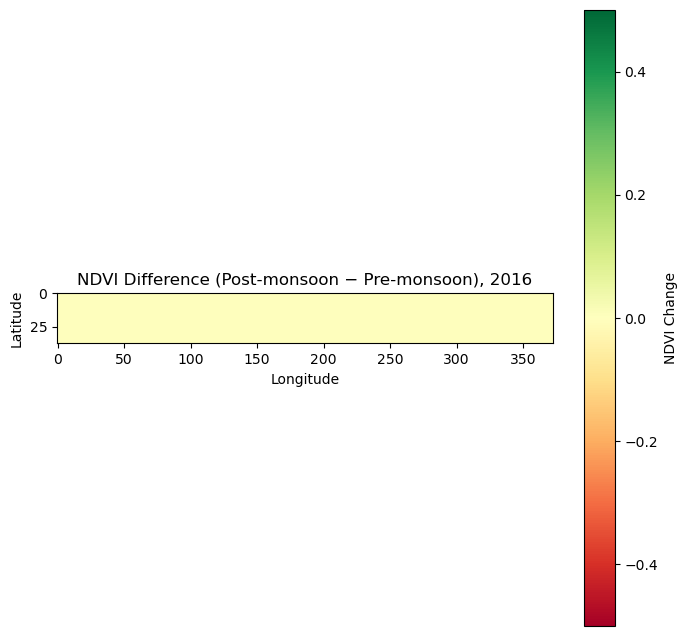

In [32]:
with rasterio.open("ndvi_difference_2020.tif") as src:
    ndvi = src.read(1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
plt.colorbar(label='NDVI Change')
plt.title('NDVI Difference (Post-monsoon − Pre-monsoon), 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()